In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Acurácia (Decision Tree): 0.88


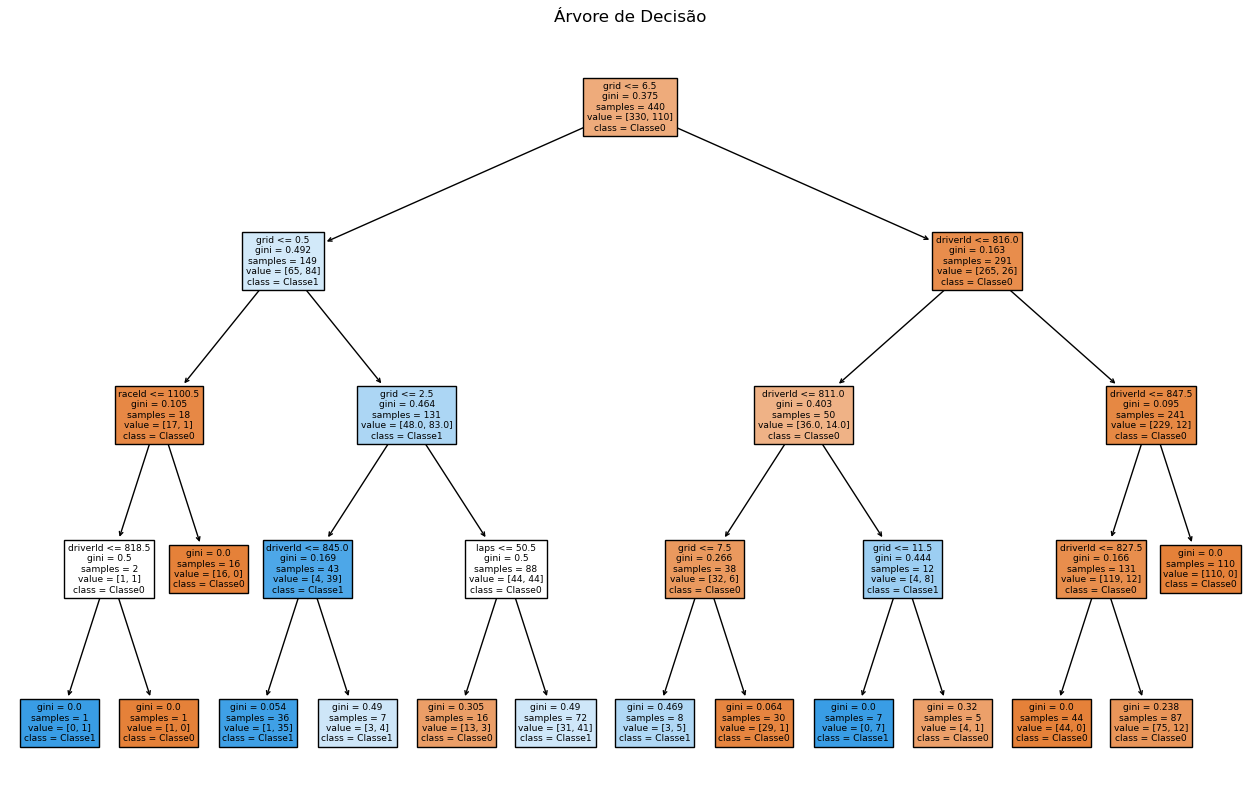

In [13]:
df = pd.read_excel('dadosFiltrados.xlsx', usecols=['raceId', 'driverId', 'grid', 'points', 'laps', 'year', 'forename', 'surname', 'positionOrder'])


df['target'] = df['points'].apply(lambda x: 1 if x >= 10 else 0)

df_train = df[df['year'] == 2023]
df_test = df[df['year'] == 2024]

X_train = df_train[['raceId', 'driverId', 'laps', 'grid']]
y_train = df_train['target']
X_test = df_test[['raceId', 'driverId', 'laps', 'grid']]
y_test = df_test['target']

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

print(f"Acurácia (Decision Tree): {accuracy_score(y_test, y_pred_tree):.2f}")

plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=['Classe0', 'Classe1'], filled=True)
plt.title("Árvore de Decisão")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(f"Acurácia (KNN): {accuracy_score(y_test, y_pred_knn):.2f}")

Acurácia (KNN): 0.86


In [15]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(f"Acurácia (SVM): {accuracy_score(y_test, y_pred_svm):.2f}")

Acurácia (SVM): 0.86


In [16]:

df_test = df_test.copy()
df_test['predicted_target_tree'] = y_pred_tree
df_test['predicted_target_knn'] = y_pred_knn
df_test['predicted_target_svm'] = y_pred_svm

# Análise: Probabilidade média para cada piloto (usando árvore de decisão como exemplo)
pilotos_probabilidade_tree = df_test.groupby(['driverId', 'forename', 'surname']).agg({'predicted_target_tree': 'mean'}).reset_index()
pilotos_probabilidade_tree = pilotos_probabilidade_tree.sort_values(by='predicted_target_tree', ascending=False)

print("\nPilotos com maior chance de obter pontos em 2025 (Árvore de Decisão):")
print(pilotos_probabilidade_tree.head(10))

print("\nResumo das acurácias:")
print(f"Decision Tree: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"KNN: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):.2f}")


Pilotos com maior chance de obter pontos em 2025 (Árvore de Decisão):
    driverId  forename     surname  predicted_target_tree
7        830       Max  Verstappen               1.000000
13       846     Lando      Norris               0.833333
12       844   Charles     Leclerc               0.750000
8        832    Carlos       Sainz               0.727273
3        815    Sergio       Pérez               0.666667
18       857     Oscar     Piastri               0.666667
14       847    George     Russell               0.583333
0          1     Lewis    Hamilton               0.500000
1          4  Fernando      Alonso               0.333333
2        807      Nico  Hülkenberg               0.083333

Resumo das acurácias:
Decision Tree: 0.88
KNN: 0.86
SVM: 0.86
